In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_val_score
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [91]:
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}
url = "https://www.amazon.co.uk/s?k=watch&ref=nb_sb_noss_1"
response = requests.get(url,headers=headers)
soup = BeautifulSoup(response.content,'html.parser')

In [95]:
reviews =[]

for element in soup.find_all('span', class_="sds-rating__link sds-button-link"):
    reviews.append(element.text.strip())
    
    
print(len(reviews))

98


In [96]:
car_model = []

for element in soup.find_all('h2', class_= "title"):
    car_model.append(element.text.strip())
    

    
print(len(car_model))

98


In [97]:
T=price,mile_num,Evaluation,reviews,car_model
cars = pd.DataFrame(T).T  #transpose
cars.columns = ['price', 'mile_num','Evaluation', 'reviews','car_model']

cars.shape

(98, 5)

In [98]:
cars = cars.dropna()

In [99]:
cars.head()

,price,mile_num,Evaluation,reviews,car_model
0,"$18,888","11,542 mi.",3.4,(28 reviews),2019 Mitsubishi Outlander ES
1,"$22,200","12,128 mi.",4.7,(325 reviews),2020 Mitsubishi Outlander ES
2,"$3,995","187,365 mi.",3.1,(29 reviews),2008 Mitsubishi Outlander XLS
3,"$18,999","35,266 mi.",4.9,"(25,011 reviews)",2018 Mitsubishi Outlander ES
4,"$12,950","89,950 mi.",3.9,(17 reviews),2016 Mitsubishi Outlander SE


In [100]:
cars['price'] = cars['price'].apply(lambda x: float(x.replace('$','').replace(',','') ))

In [101]:
cars['mile_num'] = cars['mile_num'].apply(lambda x: float(x.replace('mi','').replace('.','').replace(',','')  ))

In [102]:
cars['Evaluation'] = cars['Evaluation'].apply(lambda x: float(x))

In [103]:
cars['reviews'] = cars['reviews'].apply(lambda x: float(x.split(' ')[0].replace('(','').replace(',','')))

In [104]:
cars['car_model'] = cars['car_model'].apply(lambda x: float(x.split(' ')[0]))

In [105]:
cars.head()

,price,mile_num,Evaluation,reviews,car_model
0,18888.0,11542.0,3.4,28.0,2019.0
1,22200.0,12128.0,4.7,325.0,2020.0
2,3995.0,187365.0,3.1,29.0,2008.0
3,18999.0,35266.0,4.9,25011.0,2018.0
4,12950.0,89950.0,3.9,17.0,2016.0


In [107]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       95 non-null     float64
 1   mile_num    95 non-null     float64
 2   Evaluation  95 non-null     float64
 3   reviews     95 non-null     float64
 4   car_model   95 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB


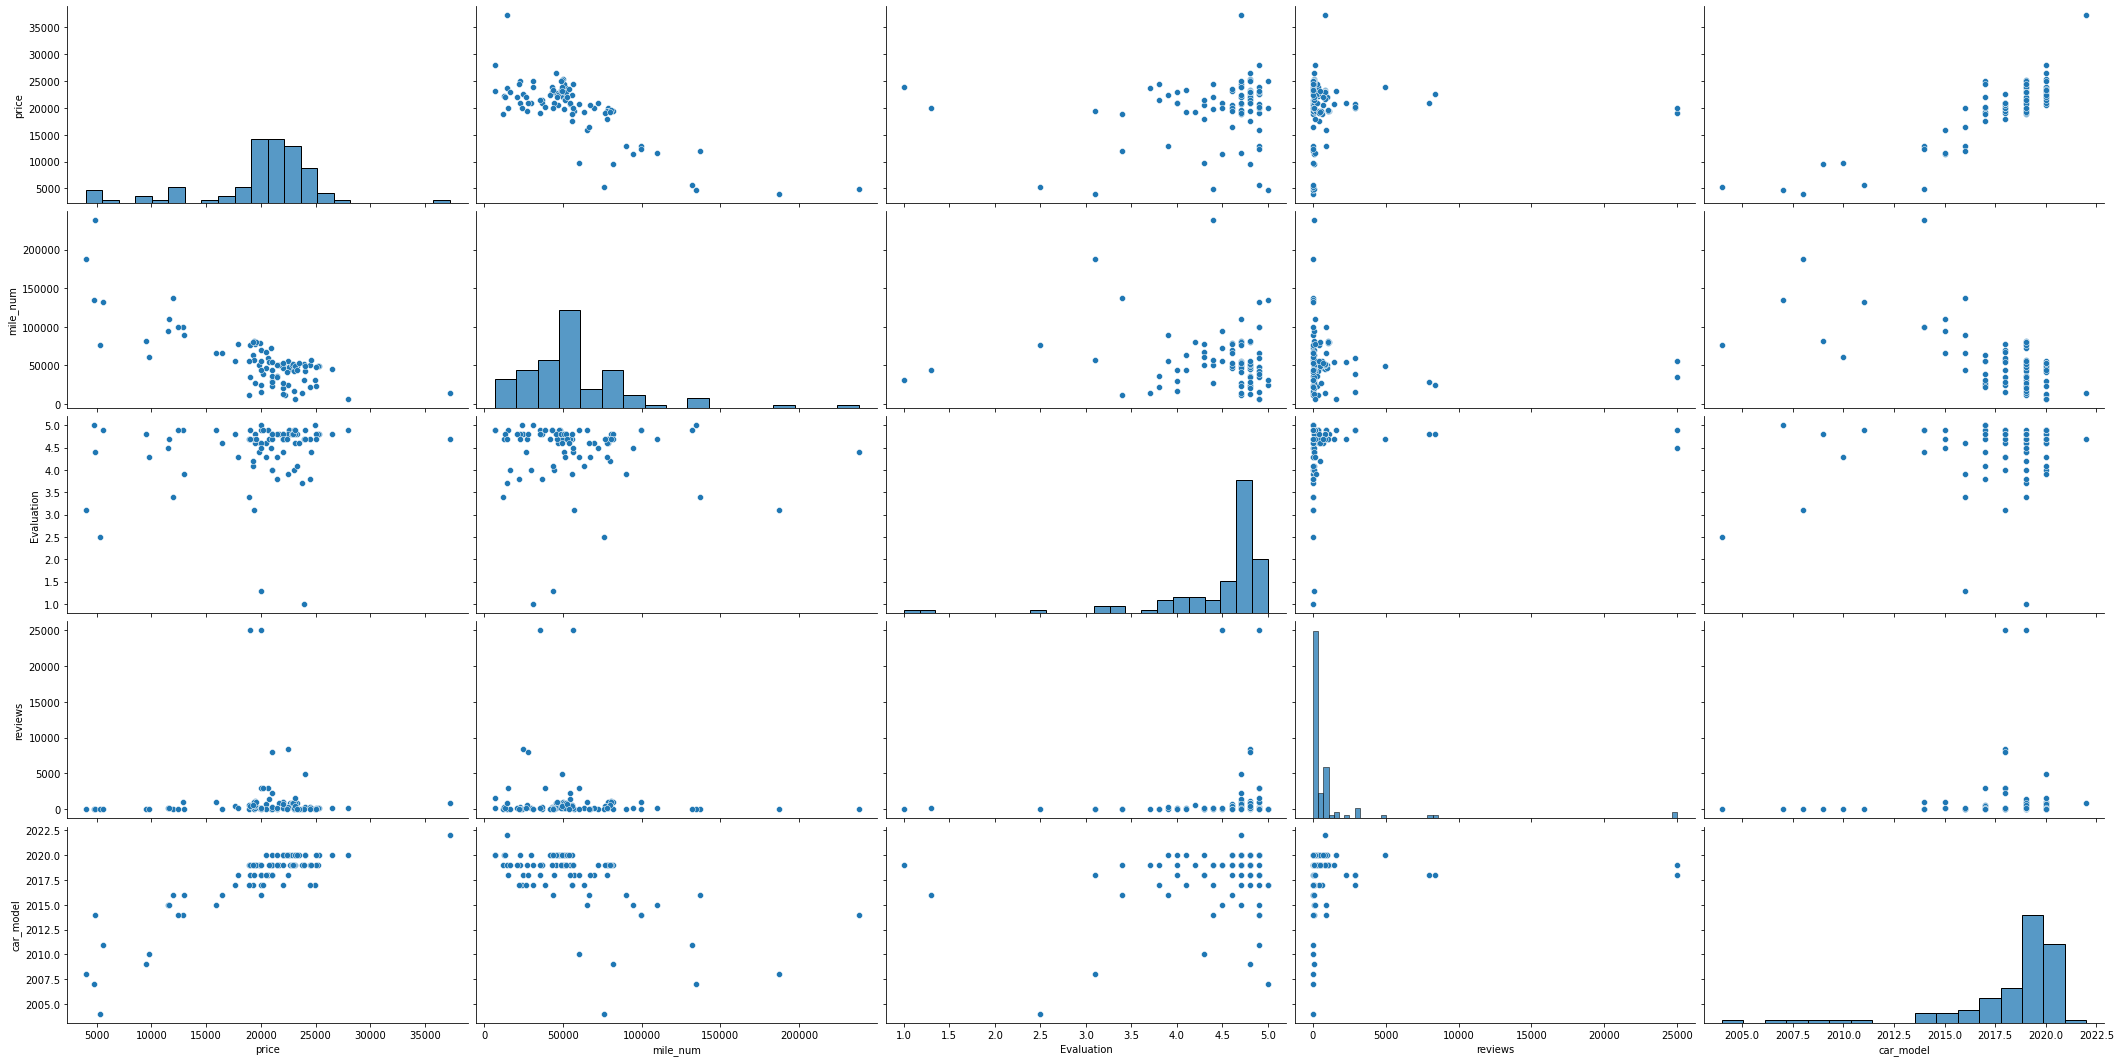

In [108]:
sns.pairplot(cars, height=3, aspect=2);

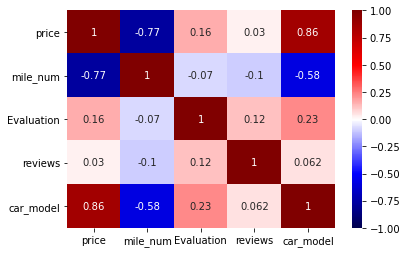

In [109]:
sns.heatmap(cars.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

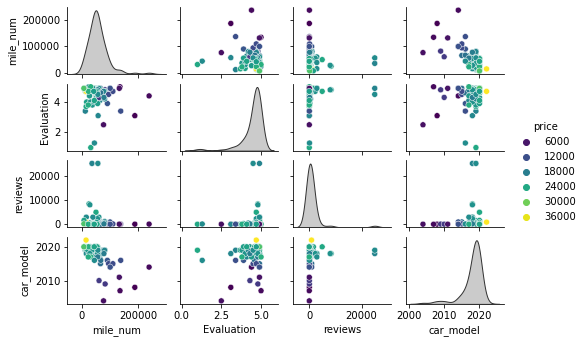

In [110]:
sns.pairplot(cars, palette='viridis' , hue='price', height=1.2, aspect=1.5, diag_kws={"hue": None, "color": ".2"})

In [163]:
X_train, X_test, y_train, y_test = train_test_split(price, mile_num, train_size = 0.7, test_size = 0.3, random_state =100)

In [164]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, train_size = 0.75, test_size = 0.25, random_state =100)

In [172]:
arr = numpy.asarray(X_train2)
arr = numpy.asarray(y_train2)